<a href="https://colab.research.google.com/github/luizfelip3/luizfelip3/blob/main/Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia. Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.


[Link dataset](https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
base_dados = pd.read_csv('/content/startups_2022.csv')

In [3]:
#Linhas x Colunas
base_dados.shape

(1186, 7)

In [4]:
base_dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [5]:
base_dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [14]:
# renomear

base_dados.rename(
    columns={
        'Company':'Empresa',
        'Valuation ($B)': 'Valor ($)',
        'Date Joined':'Data de Adesão',
        'Country':'Pais',
        'City\xa0': 'Cidade',
        'Industry':'Setor',
        'Investors':'Investidores'
    }, inplace=True
)

In [17]:
# Verificando os tipos das colunas
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($)       1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   Cidade          1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [18]:
# Campos nulos
base_dados.isnull().sum()

Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade             0
Setor              0
Investidores      18
dtype: int64

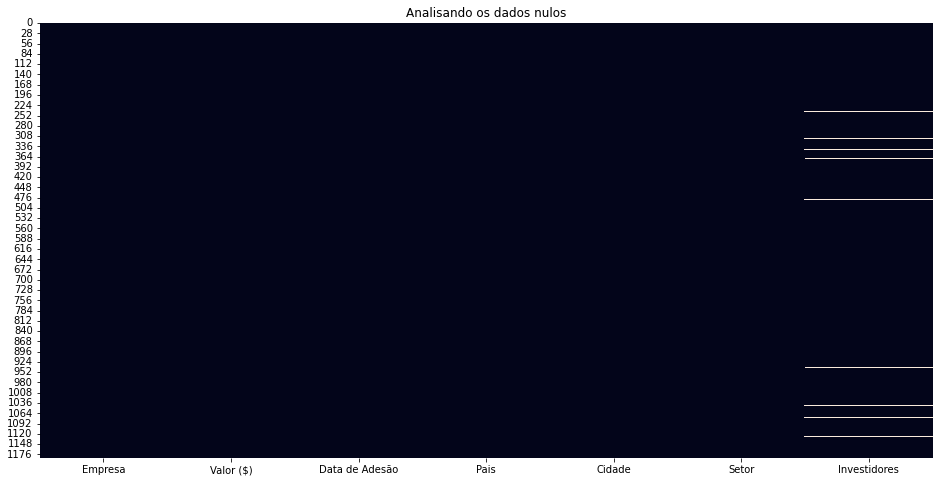

In [24]:
# Graficos com os dados nulos
plt.figure(figsize=(16,8))
sns.heatmap(base_dados.isnull(), cbar=False)
plt.title('Analisando os dados nulos');

In [25]:
# Campos unicos
base_dados.nunique()

Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
Cidade             286
Setor               34
Investidores      1152
dtype: int64

In [28]:
# Valores unicos por setor
base_dados['Setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [29]:
# Porcentagem de dados
base_dados['Setor'].value_counts(normalize=True)

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

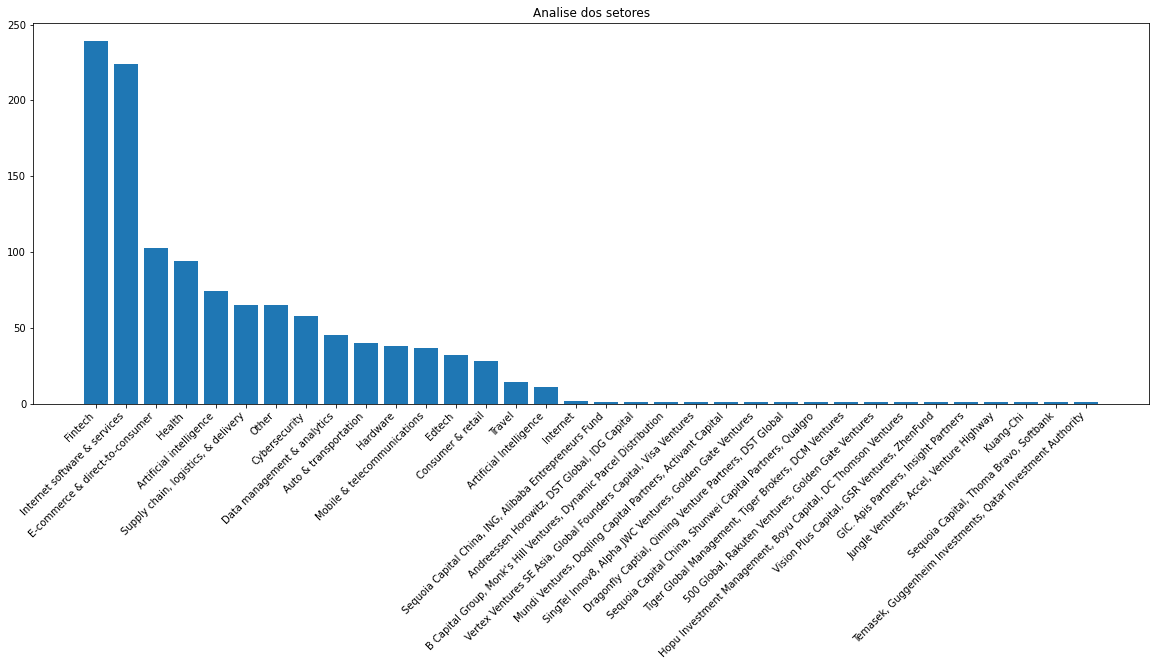

In [39]:
plt.figure(figsize=(20,7))
plt.title('Analise dos setores')
plt.bar(base_dados['Setor'].value_counts().index, base_dados['Setor'].value_counts())
plt.xticks(rotation=45, ha='right'); # inclinar o eixo X

In [43]:
analise_paises = round(base_dados['Pais'].value_counts(normalize = True) * 100,1)

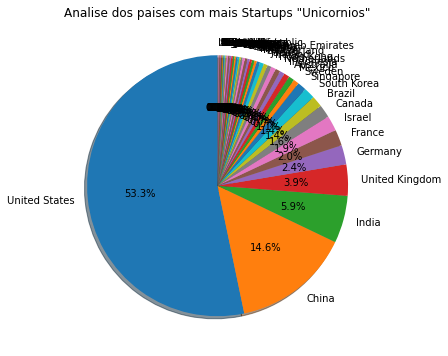

In [52]:
# PLot geral dos paises
plt.figure(figsize=(16,6))
plt.title('Analise dos paises com mais Startups "Unicornios"')
plt.pie(analise_paises,
        labels=analise_paises.index,
        shadow=True,
        startangle=90,
        autopct='%1.1f%%'
);



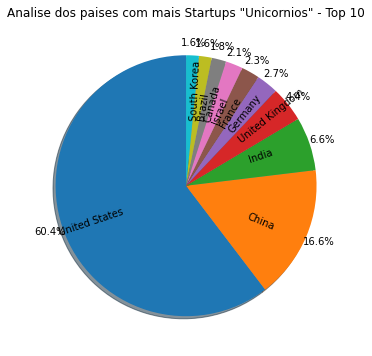

In [83]:
plt.figure(figsize=(16,6))
plt.title('Analise dos paises com mais Startups "Unicornios" - Top 10')
plt.pie(analise_paises.head(10),
        labels=analise_paises.index[0:10],
        shadow=True,
        startangle=90,
        autopct='%1.1f%%',
        pctdistance=1.1,
        rotatelabels=True,
        labeldistance=0.5
);

In [95]:
base_dados['Data de Adesão']

0        4/7/2017
1       12/1/2012
2        7/3/2018
3       1/23/2014
4        1/8/2018
          ...    
1181    6/21/2022
1182    6/21/2022
1183     7/5/2022
1184    7/12/2022
1185    7/27/2022
Name: Data de Adesão, Length: 1186, dtype: object

In [96]:
# A coluna de Datas em como objeto, vamos passar para o formata datetime
base_dados['Data de Adesão'] = pd.to_datetime(base_dados['Data de Adesão'])

In [97]:
base_dados['Data de Adesão']

0      2017-04-07
1      2012-12-01
2      2018-07-03
3      2014-01-23
4      2018-01-08
          ...    
1181   2022-06-21
1182   2022-06-21
1183   2022-07-05
1184   2022-07-12
1185   2022-07-27
Name: Data de Adesão, Length: 1186, dtype: datetime64[ns]

In [100]:
# Extrair ano e mês
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data de Adesão']).year
base_dados['Mes'] = pd.DatetimeIndex(base_dados['Data de Adesão']).month

In [101]:
base_dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [114]:
Analise_agrupada = base_dados.groupby(by=['Pais','Ano','Mes','Empresa']).count().index

In [117]:
Analise_agrupada = Analise_agrupada.to_frame(index=False)

In [120]:
Analise_agrupada.loc[
    Analise_agrupada['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,Empresa
16,Brazil,2018,7,Movile
17,Brazil,2018,11,iFood
18,Brazil,2019,6,Loggi
19,Brazil,2019,9,QuintoAndar
20,Brazil,2019,10,EBANX
21,Brazil,2019,12,Wildlife Studios
22,Brazil,2020,1,Loft
23,Brazil,2020,12,C6 Bank
24,Brazil,2020,12,Creditas
25,Brazil,2021,1,MadeiraMadeira


In [123]:
# Removendo o sinal $ das linhas e passando de object para float
base_dados['Valor ($)'] = pd.to_numeric(base_dados['Valor ($)'].apply(
    lambda Linha: Linha.replace('$','')
))

In [124]:
base_dados['Valor ($)']

0       140.0
1       127.0
2       100.0
3        95.0
4        40.0
        ...  
1181      1.0
1182      1.0
1183      1.0
1184      1.0
1185      1.0
Name: Valor ($), Length: 1186, dtype: float64

In [128]:
Analise_valor_por_paises =  base_dados.groupby(by=['Pais']).sum()['Valor ($)'].reset_index()
Analise_valor_por_paises.head()

,Pais,Valor ($)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [ ]:
# Valuation por Pais
Analise_valor_por_paises.sort_values('Valor ($)', ascending=False)

In [131]:
Analise_pais_valuetion = Analise_valor_por_paises.sort_values('Valor ($)', ascending=False).copy()

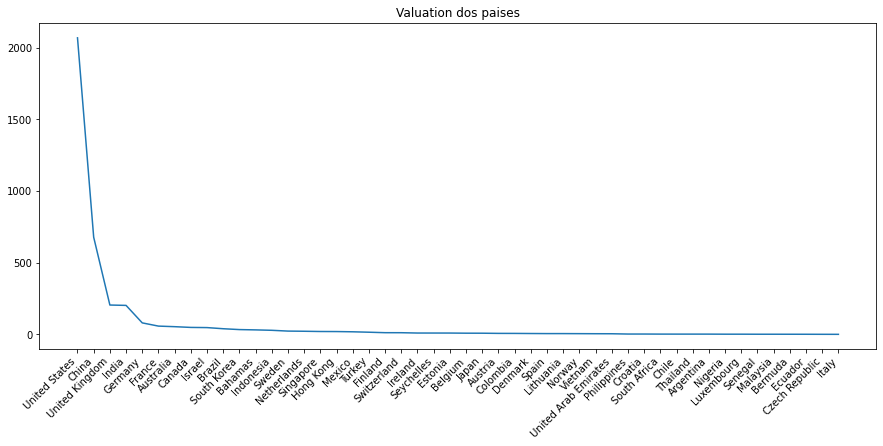

In [137]:
plt.figure(figsize=(15,6))
plt.title('Valuation dos paises')
plt.xticks(rotation=45, ha='right')
plt.plot(Analise_pais_valuetion['Pais'], Analise_pais_valuetion['Valor ($)']);